In [2]:
import QpixAsicArray as qparray
from QpixAsic import QPByte, ProcQueue
import random
import numpy as np
random.seed(2)

In [3]:
qpa = qparray.QpixAsicArray(2, 2, debug=0.0, deltaT=2e-6)
print(qpa._daqNode.daqHits)
qpa.Calibrate(0.003)
print(qpa._daqNode.daqData.items())


0
calibration complete time is: 0.006002000000000148, steps: 14
dict_items([('(0, 0)', [(473, [4.737301041616571e-06, 0, 0, 0, 265]), (150573, [0.0030067383511726054, 0, 0, 0, 167913])]), ('(0, 1)', [(1019, [1.0189401675992903e-05, 0, 1, 0, 493]), (151119, [0.0030122042659177914, 0, 1, 0, 145619])]), ('(1, 0)', [(1256, [9.813603746512878e-06, 1, 0, 0, 511]), (151356, [0.0030117984353324016, 1, 0, 0, 156878])]), ('(1, 1)', [(1587, [1.5868641616139638e-05, 1, 1, 0, 738]), (151687, [0.003017886578327828, 1, 1, 0, 140316])])])


In [7]:
qpa.Calibrate(0.003)
# qpa.Calibrate(1.0)
print()
print(qpa._daqNode.daqData.items())

calibration complete time is: 0.012002000000000944, steps: 14

dict_items([('(0, 0)', [(496, (0,0): 0000 @ 4.978648511009944e-06 - 265), (150596, (0,0): 0000 @ 0.0030069650120541735 - 160037), (300596, (0,0): 0000 @ 0.006006978510713968 - 319704), (450596, (0,0): 0000 @ 0.00900697322018427 - 479370)]), ('(1, 0)', [(989, (1,0): 0000 @ 9.889259559398195e-06 - 530), (151089, (1,0): 0000 @ 0.00301190157284178 - 161463), (301089, (1,0): 0000 @ 0.006011899275511255 - 322288), (451089, (1,0): 0000 @ 0.009011896978180917 - 483113)]), ('(0, 1)', [(1237, (0,1): 0000 @ 1.0845024801403231e-05 - 487), (151337, (0,1): 0000 @ 0.0030128583665014006 - 135339), (301337, (0,1): 0000 @ 0.006012845907960196 - 270100), (451337, (0,1): 0000 @ 0.009012855710960152 - 404862)]), ('(1, 1)', [(1502, (1,1): 0000 @ 1.5034977487515254e-05 - 773), (151602, (1,1): 0000 @ 0.003017022933603696 - 155214), (301602, (1,1): 0000 @ 0.00601702823762956 - 309553), (451602, (1,1): 0000 @ 0.00901703354165556 - 463892)])])


In [ ]:
guessFrq = {}
for k, v in qpa._daqNode.pixelData.items():
    asic = k
    daqTicks = []
    asicTicks = []
    for daqTick, asicTick in v:
        daqTicks.append(daqTick)
        asicTicks.append(asicTick)
    print("asic ticks:", asicTicks)
    guessFrq[asic] = (asicTicks[-1] - asicTicks[-2]) / (daqTicks[1] - daqTicks[0])  * qpa._daqNode.fOsc
for asic in qpa:
    key = f"({asic.row},{asic.col})"
    print(f"{key} percent diff: {(guessFrq[key] - asic.fOsc) / asic.fOsc * 100:1.2E}")

[55845000.0, 48343000.0, 52087000.00000001, 46495000.0, 47416791.6041979, 47948525.73713144, 46857571.2143928, 52484257.87106447, 48141666.666666664, 50671000.0, 47864000.0, 50478999.99999999, 48296000.0, 51951250.00000001, 49319250.0, 52261500.00000001, 53501800.0, 47233200.0, 50356999.99999999, 45599400.0, 52217166.66666667, 53551833.33333333, 47151500.0, 49450000.0, 46854571.428571425, 54112285.71428572, 44877714.28571429, 47679285.71428572, 48247000.0, 53458125.0, 49374125.0, 55468125.0, 46981779.802244194, 49919342.29530052, 49353405.17720253, 51579268.97011443, 54122887.71122887, 52112988.70112989, 51487051.29487051, 53854714.528547145, 50747022.997909285, 55048177.43841469, 51138441.959821835, 48512044.35960367, 49868844.262978084, 49377385.2178985, 49514873.76051996, 49079993.33388884, 51904315.052688256, 50254518.883162834, 51550496.11568341, 53506576.41719868, 50394471.82344118, 50553317.62016999, 49942004.14256125, 48776444.53967574]


Text(0.5, 1.0, 'ASIC Frequency Error Calculation')

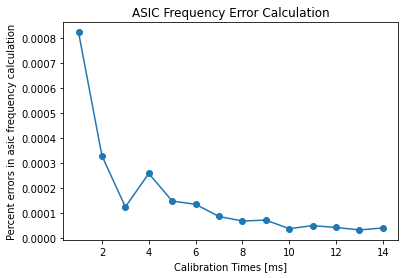

In [53]:
import QpixAsicArray as qparray
from QpixAsic import QPByte, ProcQueue
import random
import numpy as np
random.seed(2) 
# investigate why some random seeds allow you to do several calibrations and others dont, maybe it is with the asic oscillation frequency?


row = 2
col = 2

GuessFreqArray = []
PercDiffArray = {}
Keys = []
CalibrateThroughTimes = np.arange(1, 15) * 1e-3
freq = {}

for number, CalTime in enumerate(CalibrateThroughTimes):
    q = qparray.QpixAsicArray(row, col, debug = 0., deltaT = 1e-6, timeEpsilon = 2e-6, timeout=1000)
    q.Calibrate(CalTime)

    guessFrq = {}
    for k, v in q._daqNode.daqData.items():
        asic = k
        daqTicks = []
        asicTicks = []
        for daqTick, Byte in v:
            daqTicks.append(daqTick)
            asicTicks.append(Byte[4]) # Byte[4] or Byte.data depending what is appended
        if len(asicTicks) < 2:
            print(f'\nno work fo da calibration time {CalTime}: ')
            for asic in q:
                print(f'osc freq: {asic.fOsc}')
                print(f'start time {asic._startTime}')
                print()

        # print("asic ticks:", asicTicks)
        guessFrq[asic] = (asicTicks[-1] - asicTicks[-2]) / (daqTicks[-1] - daqTicks[-2])  * q._daqNode.fOsc
        GuessFreqArray.append(guessFrq[asic])
        # print(f'appending {guessFrq[asic]} for asic {asic}')

    for asic in q:
        key = f"({asic.row}, {asic.col})"
        if key not in Keys: Keys.append(key)
        # print(f"{key} percent diff: {(guessFrq[key] - asic.fOsc) / asic.fOsc * 100:1.2E}")
        percdiff = (guessFrq[key] - asic.fOsc) / asic.fOsc * 100
        if key not in PercDiffArray:
            PercDiffArray[key] = []
        PercDiffArray[key].append(percdiff)

#################################################
## PLOTTING

import pylab as p

print(GuessFreqArray)

plot = np.zeros((len(CalibrateThroughTimes)))
for runs in range(len(CalibrateThroughTimes)):
    somethingcreative = []
    for key in Keys:
        # print(key)
        # print(np.absolute(PercDiffArray[key][runs]))
        somethingcreative.append(np.absolute(PercDiffArray[key][runs]))
    plot[runs] = sum(somethingcreative) / len(Keys);

p.plot(CalibrateThroughTimes * 1e3, plot, linestyle='-', marker='o');
p.xlabel('Calibration Times [ms]')
p.ylabel('Percent errors in asic frequency calculation')
p.title('ASIC Frequency Error Calculation')

In [ ]:
import QpixAsicArray as qparray
from QpixAsic import QPByte, ProcQueue
import random
import numpy as np

row = 2
col = 2

CalTimes = np.arange(1, 20) * 1e-3
WorkingFreq = np.zeros((100000, 4))
NonWorkingFreq = np.zeros((100000, 4))
step = 0

for j in range(1000):
    random.seed(j)
    for i in CalTimes:
        q = qparray.QpixAsicArray(row, col, debug = 0., deltaT = 1e-5, timeEpsilon = 2e-6, timeout=1000)
        q.Calibrate(i)
        if q._alert:
            for index, asic in enumerate(q):
                NonWorkingFreq[step, index] = asic.fOsc
        else:
            for index, asic in enumerate(q):
                WorkingFreq[step, index] = asic.fOsc
        step+=1

WorkingFreq = WorkingFreq[NonWorkingFreq[:,0] == 0]
# print(WorkingFreq)
print()
print(WorkingFreq[WorkingFreq[:, 0] > 0])
print()
print(NonWorkingFreq[NonWorkingFreq[:, 0] > 0])

WorkingFreq = WorkingFreq[WorkingFreq[:, 0] > 0, 0:3] * 1e-6
NonWorkingFreq = NonWorkingFreq[NonWorkingFreq[:, 0] > 0, 0:3] * 1e-6
print(WorkingFreq.shape)
print(NonWorkingFreq.shape)

## seed 7
# the osc freq for asic (0, 0) is 49360299.278881
# the osc freq for asic (0, 1) is 51278578.78129128
# the osc freq for asic (1, 0) is 47674954.52419308
# the osc freq for asic (1, 1) is 49466745.13144699

## seed 2
# the osc freq for asic (0, 0) is 55845416.84043975
# the osc freq for asic (0, 1) is 48342865.22983295
# the osc freq for asic (1, 0) is 52087871.44916841
# the osc freq for asic (1, 1) is 46494725.52881786

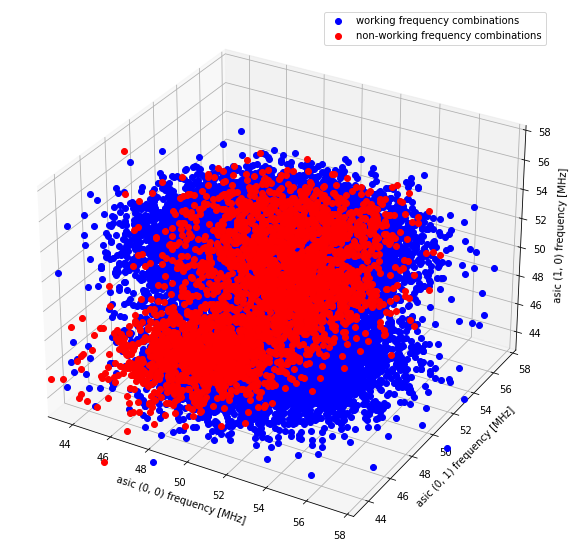

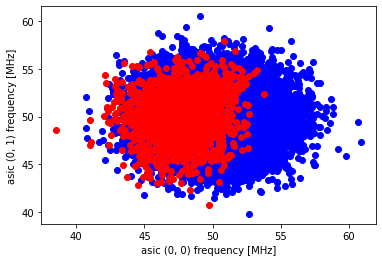

In [51]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim(43, 58)
ax.set_xlabel('asic (0, 0) frequency [MHz]')
ax.set_ylim(43, 58)
ax.set_ylabel('asic (0, 1) frequency [MHz]')
ax.set_zlim(43, 58)
ax.set_zlabel('asic (1, 0) frequency [MHz]')

ax.plot(*WorkingFreq, marker = 'o', color = 'blue', linestyle = '');
ax.plot(*NonWorkingFreq, marker = 'o', color = 'red', linestyle = '');
ax.legend(('working frequency combinations', 'non-working frequency combinations'));
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('red')
plt.show()

plt.plot(WorkingFreq[:,0], WorkingFreq[:,1], marker = 'o', color = 'blue', linestyle = '')
plt.plot(NonWorkingFreq[:,0], NonWorkingFreq[:, 1], marker = 'o', color = 'red', linestyle = '')
plt.xlabel('asic (0, 0) frequency [MHz]')
plt.ylabel('asic (0, 1) frequency [MHz]')
plt.show()

In [8]:
import QpixAsicArray as qparray
from QpixAsic import QPByte, ProcQueue
import random
import numpy as np
random.seed()

DIRECTIONS = ("North", "East", "South", "West")


array = qparray.QpixAsicArray(2, 2, deltaT=1e-6, timeout=1000)
array.Interrogate(interval=.1, duration=.2)

for asic in array:
#     asic.PrintFifoInfo()
    print(asic._remoteFifos[1]._maxSize)

# for asic in array:
#     key = f'({asic.row}, {asic.col})'
#     print(f'for asic {key} the local fifo max is {asic._localFifo._maxSize}')
#     for direc in range(4):
#         print(f'asic {key} remote fifo from {DIRECTIONS[direc]} max size is {asic._remoteFifos[direc]._maxSize}')

performing timestamp..
Generating Poisson Hits for (0, 0) at target time 0
there are no new hits
Generating Poisson Hits for (0, 1) at target time 4.900748224375783e-06
there are no new hits
Generating Poisson Hits for (1, 0) at target time 4.900748224375783e-06
there are no new hits
Generating Poisson Hits for (1, 1) at target time 1.0606533049276638e-05
there are no new hits
timestamp complete in 14 steps
time is now 0.1s 

performing timestamp..
Generating Poisson Hits for (0, 0) at target time 0.1
giving asic (0, 0) 29 hits
Generating Poisson Hits for (0, 1) at target time 0.10000490074822438
giving asic (0, 1) 29 hits
Generating Poisson Hits for (1, 0) at target time 0.10000490074822438
giving asic (1, 0) 29 hits
Generating Poisson Hits for (1, 1) at target time 0.10001060653304927
giving asic (1, 1) 24 hits
timestamp complete in 125 steps
time is now 0.2s 

31
0
0
0
